In [3]:
# numpy


In [4]:
import numpy as np

In [5]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [6]:
b = np.array([[1., 2., 3.], [4., 5., 6.]])
b

array([[1., 2., 3.],
       [4., 5., 6.]])

In [10]:
b[1,1]

5.0

In [14]:
c = np.arange(0, 12) 
#same as
c = np.arange(12)
c


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
d = np.reshape(c, (4,3))
d

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [19]:
x = np.linspace(-10, 10, num = 100)
y = x**2 *np.sin(x)


In [ ]:
# matplotlib is good for making publication quality plots
import matplotlib.pyplot as plt
plt.plot(x, y, '-ok')

In [ ]:
# interactive plotting is good for prototyping code and exploring data.
import plotly.express as px
px.line(x=x, y=y)

## array fundamentals
### arrays have 'shapes' and 'dtypes'

In [23]:
d.shape

(4, 3)

In [24]:
d.dtype

dtype('int64')

In [27]:
moon = plt.imread('/Data/moonlanding.png')
moon.shape

(474, 630)

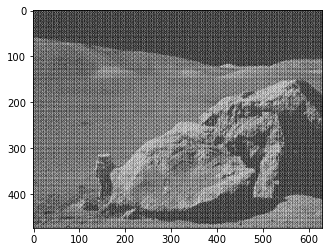

In [29]:
plt.imshow(moon, cmap='gray')

In [31]:
np.min(moon), np.max(moon) # values are between 1 and zero

(0.0, 1.0)

In [32]:
# sequence unpacking:
rows, cols = moon.shape

In [33]:
# how many values
rows * cols

298620

In [34]:
moon.dtype

dtype('float32')

In [35]:
# number of bytes each item occupies in memory
moon.dtype.itemsize

4

### Exercise
1. Read in this image: '/Data/hot-air-balloon1.jpg' into a NumPy array and call it 'balloon'
2. What is the shape? What does this mean?
3. What is the dtype? What does this mean?

4. What is the range of values (min to max)?

5. Plot it using plt.imshow()

6. How many pixels does the image have? How many megapixels did the camera have?

7. How much space does the array balloon use in memory?
8. Use slicing (indexing using colons in square brackets to view a subset (just the basket)

In [44]:
balloon = plt.imread('/Data/hot-air-balloon1.jpg')
balloon.shape
# three dimensional array, describing the colors? RGB?

(1932, 2576, 3)

In [62]:
type(balloon)

numpy.ndarray

In [39]:
balloon.dtype
# unsigned integer type

dtype('uint8')

In [42]:
balloon.min(), balloon.max()

(0, 255)

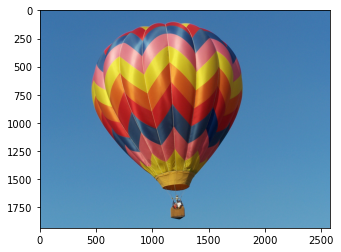

In [43]:
plt.imshow(balloon)

In [65]:
# number of pixels:
r,c,d = balloon.shape
print('Pixels: ' + str(r*c))
print('MegaPixels: ' + str(r*c/10**6)) #?

Pixels: 4976832
MegaPixels: 4.976832


In [66]:
# memory
balloon.dtype.itemsize * r*c*d

14930496

In [68]:
# alternative:
from humanize import naturalsize
naturalsize(balloon.nbytes)

'14.9 MB'

In [55]:
balloon.shape

(1932, 2576, 3)

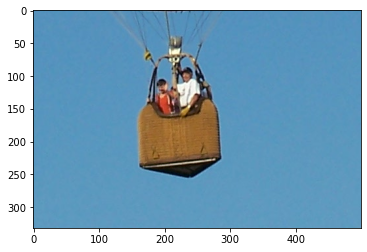

In [63]:
# plotting the basket only using slicing
# balloon[start_row:end_row, start_col:end_col,:]
plt.imshow(balloon[1600:,1000:1500,:])
# can omit the last dimension in the call, it will include the entire dimension if omitted
# plt.imshow(balloon[1600:,1000:1500])

## Arrays: Monte Carlo simulation

![](https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/b/ba/Monte-Carlo01.gif)

In [69]:
estimate_pi = 0.8 * 4
estimate_pi

3.2

## What proportion of points are inside the circle? Less than r=1?

In [71]:
x = np.random.uniform()
y = np.random.uniform()

In [72]:
x,y

(0.7982121463658708, 0.001430863327016807)

### is this point in the unit circle?

In [74]:
# hypotenuse length:
np.sqrt(x**2 + y **2)

0.7982134288370942

In [75]:
# shortcut:
np.hypot(x,y) <1

True

Exercise
Write a for loop 100,000 times which:

1. samples a random point (x, y)
2. tests whether the point (x, y) is in the unit circle?
3. if so, increment your count by 1.
4. After your loop, calculate count / 100_000 for the proportion of points that are in the circle.

In [88]:
nreps = 100_000
count = 0
for i in range(1, nreps):
    #x = np.random.uniform()
    #y = np.random.uniform()
    # alternative:
    x, y = np.random.uniform(size=2)
    if np.hypot(x,y) < 1:
        count += 1
        #count = count+1
print(count/nreps)        
# estimate pi
est_pi = count/nreps * 4
print('Estimate of pi: ' + str(est_pi))

0.78412
Estimate of pi: 3.13648


In [87]:
list(range(2,10))
# gives 10-2 elements starting at 2

[2, 3, 4, 5, 6, 7, 8, 9]

## Refinement

In [89]:
def estimate_pi(nreps = 100_000):
    count = 0
    for i in range(1, nreps):
        x, y = np.random.uniform(size=2)
        if np.hypot(x,y) < 1:
            count += 1
    # estimate pi
    return count/nreps * 4
    


In [92]:
%timeit estimate_pi()

506 ms ± 5.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit? # will get help

### speeding it up

In [96]:
#vectorised: see the trainer notes for more breakdown information on how we get here:
def estimate_pi_vec(nreps = 100_000):
    x,y = np.random.uniform(size=(2, nreps))
    distances = np.hypot(x, y)
    in_circle = distances < 1
    estimate_pi = np.count_nonzero(in_circle) / nreps * 4
    return estimate_pi

In [97]:
%timeit estimate_pi_vec()

3.42 ms ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### you can operate on entire arrays at once with elementwise operations.
### eliminating loops can speed up the code
Can also use jit from Numba toolbox

### Application

### Example 2: investment simulator
John and Jane want to save money to buy a house for their newborn son, Patrick. They want to have $850k saved by the time Patrick is finishing university 21 years from now.

They are planning to save $20k each year (ignore taxes). Assume that the return each year is normally distributed (mean 6%, stdev 10%).

Run a simulation with at least 1000 trials.

(a) What is the probability that they will hit their savings goal?

(b) How much money would they need to save each year to be 90% likely to hit their savings goal?

In [99]:
np.random.uniform(low=0, high=1, size=2)

array([0.41932375, 0.52160423])

In [101]:
returns = np.random.normal(0.06, 0.1, size=21)
returns

array([ 0.08109172,  0.05404028,  0.15775284,  0.1200489 ,  0.0368458 ,
        0.08635951,  0.13156763, -0.04349515,  0.17003015,  0.04690757,
        0.13331309,  0.14256482,  0.03609451, -0.05722424,  0.06280638,
       -0.20109614, -0.17857676, -0.15838346, -0.08986287,  0.11387478,
        0.10519798])

In [145]:
# this is the monte carlo pattern and is the important part:
# but this doesn't work, the helper function two cells below is correct.
def estimate_savings(nreps = 100_000):
    count = 0
    for i in range(1, nreps):
        returns = np.random.normal(0.06, 0.1, size=21)
        if savings(year=20) > 850_000:
            count += 1
    return count
    

In [146]:
def savings(year):
    """
    Return the savings at the end of the given year, assuming an investment of $20k
    at the start of each year.
    years start at 0
    """
    # Loop over the years from 0 to 20 inclusive
    # Return the amount in the kitty.
    if year == 0:
        kitty = 20_000                          # at the start of the year
    else:
        kitty = (savings(year - 1) + 20_000)    # at the start of the year
    return kitty * (1 + returns[year])

In [147]:
num_trials = 10**5
count = 0
for i in range(num_trials):
    # Simulate 21 years of market returns
    # x, y = np.random.uniform(size=2)
    returns = np.random.normal(0.06, 0.1, size=21)
    if savings(year=20) > 850_000:
        count += 1

In [148]:
count / num_trials

0.43536

So the probability that they hit their savings goal is 43.6% under this model for their investment performance ...

 ### Density estimation

We can fit a simple probabilistic model to data using scipy.stats. It provides about 80+ probability distributions

In [150]:
import pandas as pd 
hw = pd.read_csv('/Data/heights_and_weights.csv')
hw

,name,height,weight
0,Aldo,169.9,77.2
1,Tyshawn,165.9,65.8
2,Taylor,174.4,56.8
3,Lucian,179.6,103.1
4,Maya,167.2,68.5
...,...,...,...
1995,Fernando,163.1,66.2
1996,Dania,173.8,71.5
1997,Jair,174.3,60.0
1998,Emerson,172.9,83.3


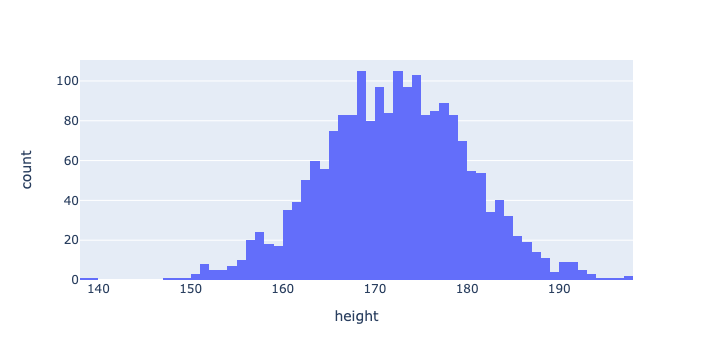

In [163]:
import plotly.express as px
px.histogram(hw, x='height')

let's fit a normal distribtuion to the heights

In [155]:
from scipy.stats import norm

In [156]:
model = norm(170, 10) # done using a quick visual estimate

In [157]:
model

Find the MLE parameters for the model given the data:

In [159]:
heights = hw['height'].values

In [161]:
params = norm.fit(heights)
params

(172.10770000000002, 7.995285530235928)

### Construct a model using those fitted parameters:

In [164]:
# model = norm(params[0], params[1])
#shortcut:
model = norm(*params) # Sequence unpacking

In [166]:
# sample random numbers from the fitted distribution:
# rvs samples random variates
model.rvs(10)


array([175.97781397, 168.94120172, 158.15240083, 174.38644842,
       161.64907998, 179.16510022, 182.23379353, 164.16184589,
       179.71607187, 194.47267979])

### How to find functions available:
use tab completion and ? after command


## Visualizing the fittend model's PDF

In [167]:
x = np.linspace(130, 210, num = 1000)

In [168]:
y = model.pdf(x) #PDF

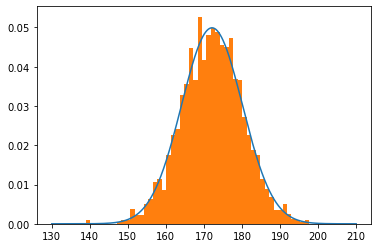

In [170]:
# superimpose the probability density on the histogram
# using matplotlib, plotly can do it, but not as easy
plt.plot(x, y)
plt.hist(hw['height'], density=True, bins=50);

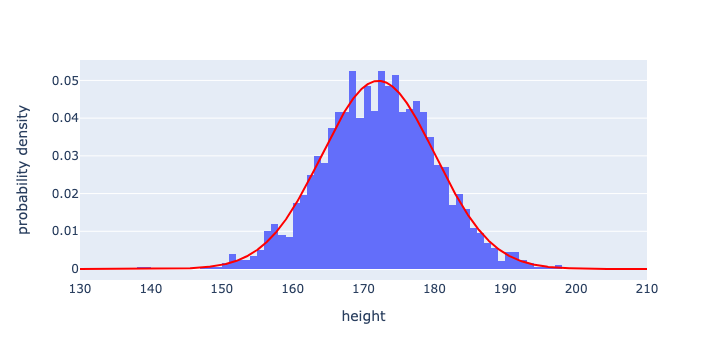

In [172]:
# plotly version:
fig1 = px.histogram(hw, x='height', histnorm='probability density')
fig2 = px.line(x=x, y=y, color_discrete_sequence=['red'])
fig1.add_traces(fig2.data)

### Exercise
Visualize a histogram of the weights. Are they symmetric? Normal?

Try fitting a beta distribution to the weights.
Note: this has 3 parameters, not 2.

Construct a new beta model using those fitted parameters.

Visualize the probability density function of the beta model on the same plot as the histogram of the weights data.

In [173]:
from scipy.stats import beta

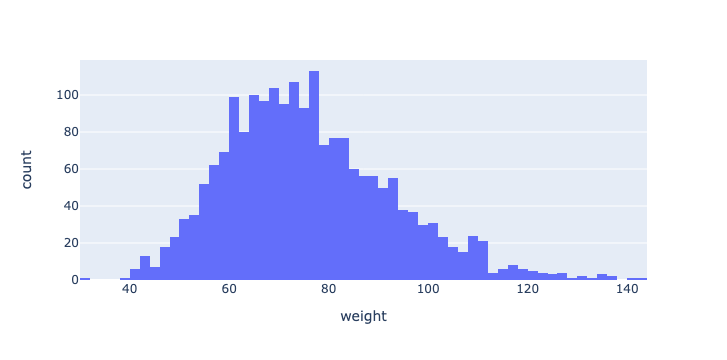

In [174]:
px.histogram(hw, x='weight')

In [175]:
weights = hw['weight']

In [180]:
# get the fit parameters for the data
params = beta.fit(weights)

/opt/conda/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:707: RuntimeWarning:

invalid value encountered in sqrt



In [181]:
params

(10.323366881230847, 5906.541904731983, 21.920477459624387, 30969.43755340732)

In [188]:
# create the model distribution with the parameters
model = beta(*params)

In [189]:
# create a x array to model
x = np.linspace(0,150, num=1000)

In [190]:
# calculate the y values for the model
y = model.pdf(x)

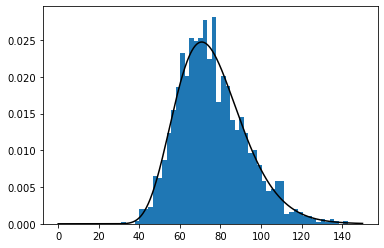

In [187]:
plt.plot(x,y,'k-')
plt.hist(weights, density=True, bins=50);

## What is the probability that a person is heavier than 150kg?

Need to know the area under the curve.
The area under the whole curve = 1


In [197]:
# just the weights as an example:
(model.cdf(np.inf) - model.cdf(150))

0.0004238883111038483

## Non-parametric density estimation
Instead of assuming a parametric form (eg normal, beta etc), you can try to let the data speak for itself using non-parametric methods
Two main methods:
1. kernal density estimation (KDE)
2. Gaussian mixture model (GMM)

![](https://upload.wikimedia.org/wikipedia/commons/2/2a/Kernel_density.svg)

In [204]:
from scipy.stats import gaussian_kde

In [205]:
weights_model_kde = gaussian_kde(weights)

In [208]:
x = np.linspace(30, 150, num=1000)
y = weights_model_kde.pdf(x);

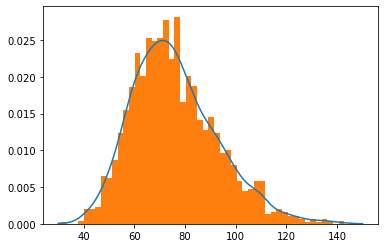

In [209]:
plt.plot(x,y)
plt.hist(weights, density=True, bins=50);

## Weirder data:


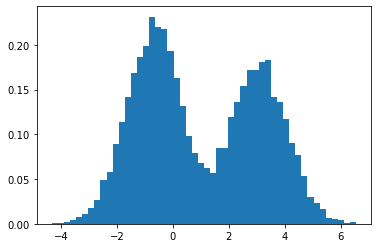

In [211]:
bimodal= pd.read_hdf('/Data/bimodal_ts.h5')
plt.hist(bimodal, density=True, bins=50);

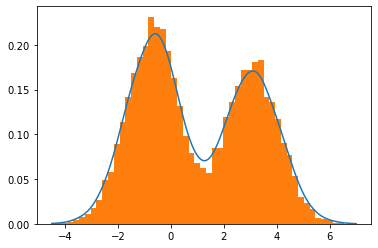

In [216]:
bmm = gaussian_kde(bimodal.values)
x = np.linspace(-4.5, 7, num=1000)
y = bmm.pdf(x);
plt.plot(x,y)
plt.hist(bimodal, density=True, bins=50);

probability that the price change is > $6

In [217]:
bmm.integrate_box_1d(6, np.inf)

0.0016006310675191772

probability that price change is between -1 and 3

In [220]:
bmm.integrate_box_1d(-1, 3)

0.5474749664952977

Quick exercise:
Read this daily data for Apple stock


In [222]:
apple = pd.read_hdf('/Data/AAPL.h5')
apple[:3]
daily_changes = apple['Adj Close'].pct_change().dropna()
daily_changes[:3]

Date
2000-01-04   -0.084355
2000-01-05    0.014567
2000-01-06   -0.086535
Name: Adj Close, dtype: float64

Visualize a histogram of the daily price changes (as a %) for Apple.

1. Fit a KDE model to the daily_changes values.

2. What is the probability under your model that Apple stock drops by 5% or more tomorrow?

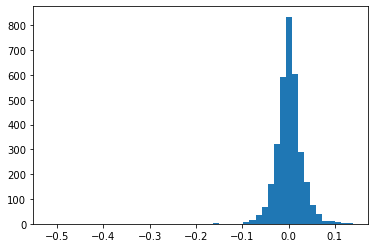

In [227]:
plt.hist(daily_changes, bins=50);

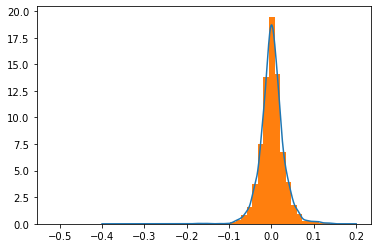

In [231]:
dcm = gaussian_kde(daily_changes.values)
x = np.linspace(-0.4, 0.2, num=1000)
y = dcm.pdf(x);
plt.plot(x,y)
plt.hist(daily_changes, density=True, bins=50);

In [232]:
# probability of stock dropping by 5% or more
dcm.integrate_box_1d(-np.inf,-0.05)

0.033278926327608004

## this function can handle more than one dimension
### What is the probability that both apple and google drop by more than 5% or more in a single day
Not independent, but highly correlated.
need a joint model

In [233]:
pf = pd.read_hdf('/Data/portfolio_flat.h5')
pf[:3]

minor           AAPL                                                           \
           Adj Close      Close       High        Low       Open       Volume   
Date                                                                            
2005-01-03  4.138829  63.290000  65.110002  62.599998  64.780001  172998000.0   
2005-01-04  4.181335  63.940001  65.470003  62.969999  63.789998  274202600.0   
2005-01-05  4.217956  64.500001  65.249998  64.049997  64.460000  170108400.0   

minor             GOOG                                      ...        IBM  \
             Adj Close       Close        High         Low  ...       High   
Date                                                        ...              
2005-01-03  101.253921  202.710351  203.640354  195.460334  ...  99.099998   
2005-01-04   97.153010  194.500326  202.930350  193.480326  ...  98.419998   
2005-01-05   96.658507  193.510330  196.900345  192.230325  ...  97.830002   

minor                                             MSFT                        \
                  Low       Open     Volume  Adj Close      Close       High   
Date                                                                           
2005-01-03  97.250000  98.970001  5295200.0  20.613684  26.740000  26.950001   
2005-01-04  96.519997  97.739998  5711000.0  20.690774  26.840000  27.100000   
2005-01-05  96.400002  96.599998  5646700.0  20.644521  26.780001  27.100000   

minor                                      
              Low       Open       Volume  
Date                                       
2005-01-03  26.65  26.799999   65002900.0  
2005-01-04  26.66  26.870001  109442100.0  
2005-01-05  26.76  26.840000   72463500.0  

[3 rows x 24 columns]

In [253]:
# extract the Adj Close column for APPL and GOOG
# multi-level headers, use xs (cross section)
adj_cl = pf.xs('Adj Close', axis=1, level=1)
appgoog = adj_cl[['AAPL', 'GOOG']].pct_change().dropna()
appgoog[:3]

minor,AAPL,GOOG
Date,,
2005-01-04,0.010270,-0.040501
2005-01-05,0.008758,-0.005090
2005-01-06,0.000775,-0.025632


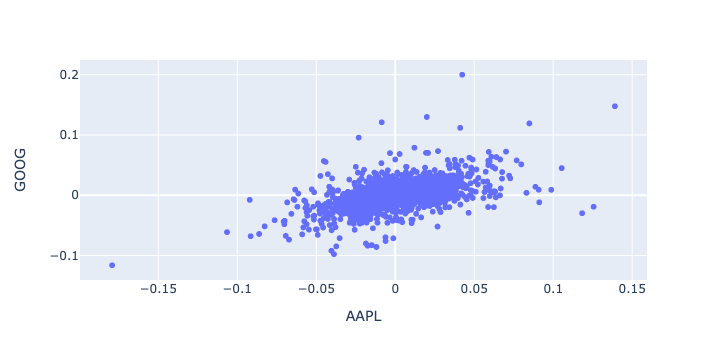

In [254]:
px.scatter(appgoog, x='AAPL',y='GOOG')

In [255]:
# gaussian_kde
appgoog_model = gaussian_kde(appgoog.T) # .T is the transpose. 
#the function wants the data passed in this way, (dimensions, data points)

In [258]:
low = (-np.inf, -np.inf)
high = (-0.05, -0.05)

In [259]:
appgoog_model.integrate_box(low, high)

0.006235571054568625

## Plot in 3D


In [243]:
import plotly.graph_objects as go


In [245]:
X, Y = np.mgrid[-.1:.1:0.005, -.1:.1:0.005]
Z = np.zeros(X.shape)

for i in range(len(X)):
    Z[i, :] = appgoog_model.pdf((X[i, :], Y[i, :]))

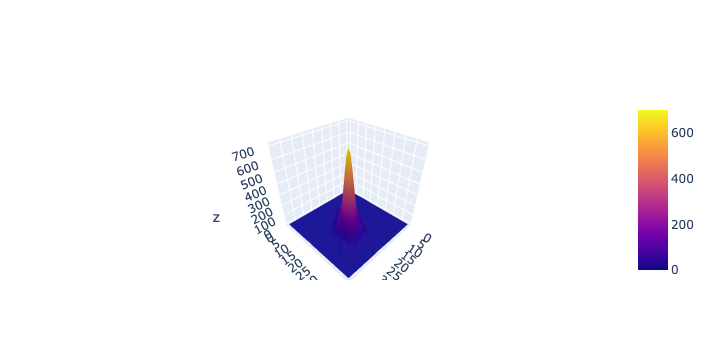

In [246]:
fig = go.Figure(data=[go.Surface(z=Z)])
fig

## Clustering
Using Scikit-learn


Automatic grouping of similar objects into sets

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### Goal, given unlabelled data, automatically group them
One application: downsampling high-dimensional data

### Example

In [260]:
from sklearn.datasets import make_blobs

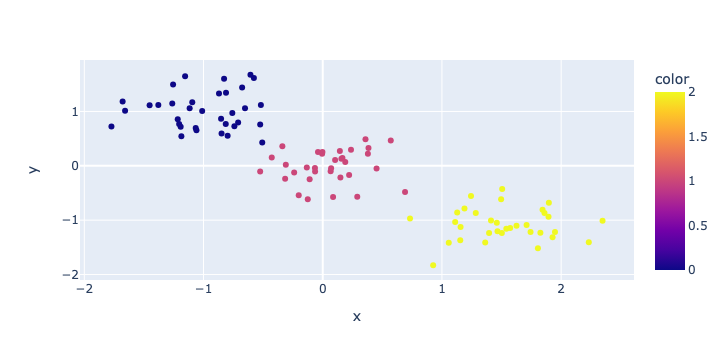

In [269]:
X, true_clusters = make_blobs(n_samples=100, n_features=2, centers=[(-1,1),(0,0),(1.5,-1)],cluster_std=0.3)
# true_clusters is the cluster information that we wouldn't usually have
# but this is synthetic data.
# goal is to recover this information in this exercise

df = pd.DataFrame(X, columns=['x', 'y'])
px.scatter(df, x='x', y='y', color=true_clusters)

In [265]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=3)

In [266]:
cluster_model.fit(X)

KMeans(n_clusters=3)

In [267]:
predicted_clusters = cluster_model.predict(X)
predicted_clusters

array([1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1,
       0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0], dtype=int32)

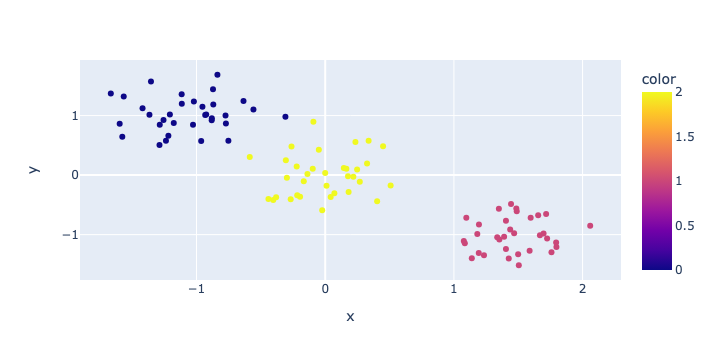

In [268]:
px.scatter(df, x='x',y='y', color=predicted_clusters)

## Example 2
Load this dataset using Pandas: /Data/abalone.csv

Cluster the shell weights using KMeans.

Plot a histogram of the shell weights, colouring by your predicted clusters.

In [272]:
df = pd.read_csv('/Data/abalone.csv')
df

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [285]:
shellw = df['shell weight'].values
# only have one column, need to reshape it to do the clustering
shellw.shape

(4177,)

In [288]:
X = shellw.reshape(len(shellw),1)
# Shortcut:
# X = shellw.reshape(-1, 1) #-1 means ?: means fill in this value automatically
X.shape

(4177, 1)

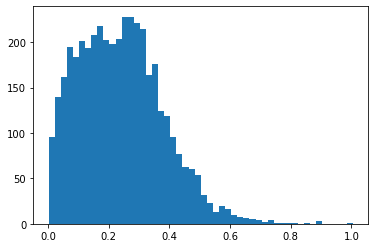

In [289]:
plt.hist(shellw, bins=50);

In [314]:
cm = KMeans(n_clusters=3)

In [315]:
cm.fit(X) # X has to be a 2-d matrix

KMeans(n_clusters=3)

In [316]:
predicted_clusters = cm.predict(X)
predicted_clusters.shape


(4177,)

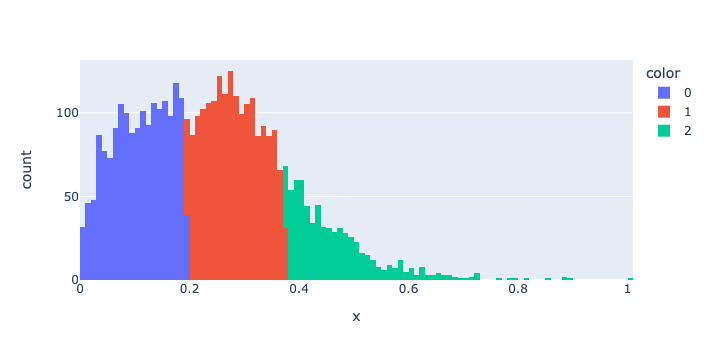

In [320]:
# make it a dataframe to plot it again
df = pd.DataFrame(X, columns=['shell weight'])
px.histogram(df, x='shell weight', color=predicted_clusters)
# or without the dataframe:
px.histogram(x=shellw, color=predicted_clusters)

### Question: how many colours are there in this image?
This is the number of colours possible given the data type (unsigned integers, 8 bits):

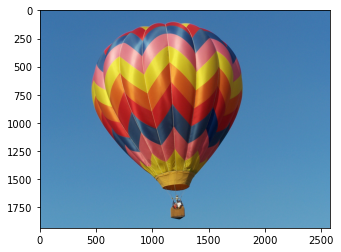

In [321]:
plt.imshow(balloon)

In [322]:
flat_balloon = balloon.reshape(-1, 3)
flat_balloon

array([[ 60, 112, 170],
       [ 60, 112, 170],
       [ 60, 112, 170],
       ...,
       [100, 160, 197],
       [101, 161, 198],
       [102, 162, 199]], dtype=uint8)

### Example: we can downsample this in colour space to use only 8 colours
This time we'll use the MiniBatchKMeans algorithm, an approximation to KMeans, which scales better to larger datasets.

In [323]:
from sklearn.cluster import MiniBatchKMeans

In [324]:
cluster_model = MiniBatchKMeans(n_clusters=8)
cluster_model.fit(flat_balloon)

MiniBatchKMeans()

In [325]:
clusters = cluster_model.predict(flat_balloon)

In [333]:
clusters

array([7, 7, 7, ..., 1, 1, 1], dtype=int32)

So every pixel has a predicted cluster numbered 0 through 7.

In [326]:
cluster_model.cluster_centers_.shape

(8, 3)

In [327]:
cluster_model.cluster_centers_.dtype

dtype('float64')

This is a matrix of 8 rows representing 8 colours, each with RGB. These are in some sense "central" colours for each cluster.

In [330]:
palette = cluster_model.cluster_centers_.astype(np.uint8)

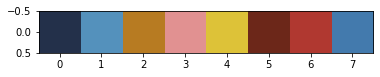

In [332]:
plt.imshow(palette.reshape(1, -1, 3)) # 1 row, 8 columns, 3 colours

 Next, reconstruct the image based on these 8 colours

In [339]:
flat_balloon.shape

(4976832, 3)

### Fancy indexing

In [340]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [341]:
b = a**2

In [342]:
b

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [343]:
# select item 0
b[0]

0

In [346]:
# select items 0 and 2 and the last one and first one again
indices = [0, 2, -1, 0]
b[indices]

array([  0,   4, 121,   0])

In [347]:
# why is this relevant?
# palette and clusters are related. Clusters indicates the index of palette
palette

array([[ 35,  48,  74],
       [ 84, 145, 188],
       [183, 123,  34],
       [225, 145, 145],
       [221, 194,  56],
       [108,  39,  25],
       [176,  56,  48],
       [ 67, 122, 173]], dtype=uint8)

In [348]:
clusters

array([7, 7, 7, ..., 1, 1, 1], dtype=int32)

In [349]:
clusters.shape

(4976832,)

In [350]:
# grab rows 3,3,3 etc from the palette matrix
new_balloon = palette[clusters]
new_balloon.shape

(4976832, 3)

In [351]:
new_balloon

array([[ 67, 122, 173],
       [ 67, 122, 173],
       [ 67, 122, 173],
       ...,
       [ 84, 145, 188],
       [ 84, 145, 188],
       [ 84, 145, 188]], dtype=uint8)

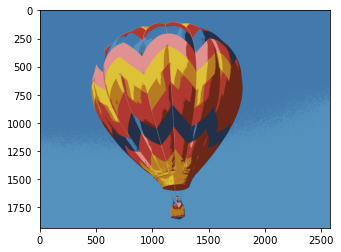

In [364]:
#reshape to original shape
# rows, columns, color depth
plt.imshow(new_balloon.reshape(r,c,3))

## Outlier detection/ anomaly detection

Detection of outliers for QC purposes, filtering them out before constructing your model.


pyOD: https://pyod.readthedocs.io/en/latest/

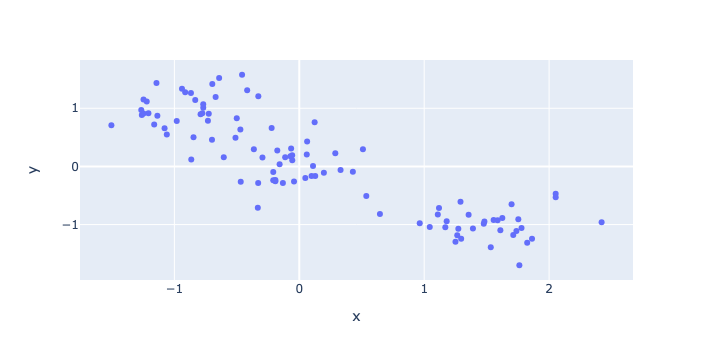

In [365]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=[(-1,1),(0,0),(1.5,-1)],cluster_std=0.3)

df = pd.DataFrame(X, columns=['x', 'y'])
px.scatter(df, x='x', y='y')

In [389]:
from pyod.models.knn import KNN

In [393]:
outlier_model = KNN(contamination=0.15) 


In [394]:
outlier_model.fit(X)

KNN(algorithm='auto', contamination=0.15, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [401]:
outliers = (outlier_model.predict(X) == 1)

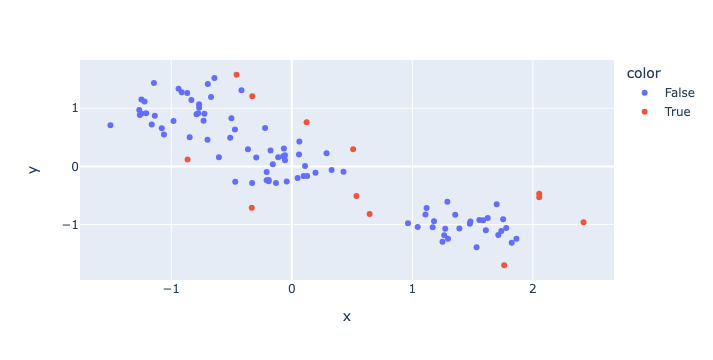

In [402]:
px.scatter(df, x='x', y='y',color=outliers)

## Example: outlier detection for pedestrian traffic
The City of Melbourne publishes an open dataset with counts of pedestrians walking past every intersection every hour.

In [403]:
peds = pd.read_csv('/Data/pedestrians_2018.csv.gz')
peds[:3]

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2079938,01/01/2018 12:00:00 AM,2018,January,1,Monday,0,1,Bourke Street Mall (North),895
1,2079939,01/01/2018 12:00:00 AM,2018,January,1,Monday,0,2,Bourke Street Mall (South),734
2,2079940,01/01/2018 12:00:00 AM,2018,January,1,Monday,0,3,Melbourne Central,2996


let's just consider Bourke Street Mall (North) and reshape to one row per day, one column per hour

In [408]:
mask = peds['Sensor_Name'] == 'Bourke Street Mall (North)'
bourke = peds.loc[mask].copy()
bourke['Date_Time'] = pd.to_datetime(bourke['Date_Time'])
bourke[:3]

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2079938,2018-01-01,2018,January,1,Monday,0,1,Bourke Street Mall (North),895
46,2079984,2018-01-01,2018,January,1,Monday,1,1,Bourke Street Mall (North),890
92,2080030,2018-01-01,2018,January,1,Monday,2,1,Bourke Street Mall (North),435


In [409]:
# reshape it so we have one row per day, one column per hour
bw = bourke.pivot_table(index=bourke['Date_Time'].dt.date, columns='Time', values='Hourly_Counts', aggfunc='sum')
bw[:3]

Time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,895,890,435,299,181,87,59,107,109,312,...,2897,2919,2898,2521,2096,1585,879,761,325,153
2018-01-02,73,53,19,19,24,38,72,232,445,646,...,3175,3152,3126,2957,2392,1668,849,534,328,211
2018-01-03,84,67,21,24,6,20,102,272,507,858,...,3492,3345,3375,3449,2689,1915,1082,822,516,216


### Exercise
Construct a new outlier detection model using K Nearest Neighbours (KNN)

Fit the model on the bourke_wide data.

Pass the same data into model.predict() to find outliers

Use indexing to display which days were the strange ones.

In [410]:
om = KNN(contamination=0.15) 

In [411]:
om.fit(bw)

KNN(algorithm='auto', contamination=0.15, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [414]:
outliers = (om.predict(bw) == 1)


In [422]:
bw.index[outliers]
# just the strange days, outliers

Index([2018-01-01, 2018-01-05, 2018-01-06, 2018-01-19, 2018-01-20, 2018-01-21,
       2018-01-26, 2018-01-28, 2018-01-29, 2018-01-30, 2018-02-08, 2018-02-17,
       2018-02-18, 2018-03-10, 2018-03-11, 2018-03-30, 2018-03-31, 2018-04-08,
       2018-04-10, 2018-04-15, 2018-05-11, 2018-08-31, 2018-10-05, 2018-10-24,
       2018-11-05, 2018-11-06, 2018-11-09, 2018-11-17, 2018-11-23, 2018-11-24,
       2018-11-25, 2018-11-30, 2018-12-01, 2018-12-07, 2018-12-08, 2018-12-14,
       2018-12-15, 2018-12-16, 2018-12-18, 2018-12-20, 2018-12-21, 2018-12-22,
       2018-12-23, 2018-12-24, 2018-12-25, 2018-12-26, 2018-12-27, 2018-12-28,
       2018-12-29, 2018-12-31],
      dtype='object', name='Date_Time')

In [ ]:
bw.loc[outliers]

### plotting this data

In [424]:
weird = bw.loc[outliers]
non_weird = bw.loc[~outliers]

<AxesSubplot:xlabel='Time'>

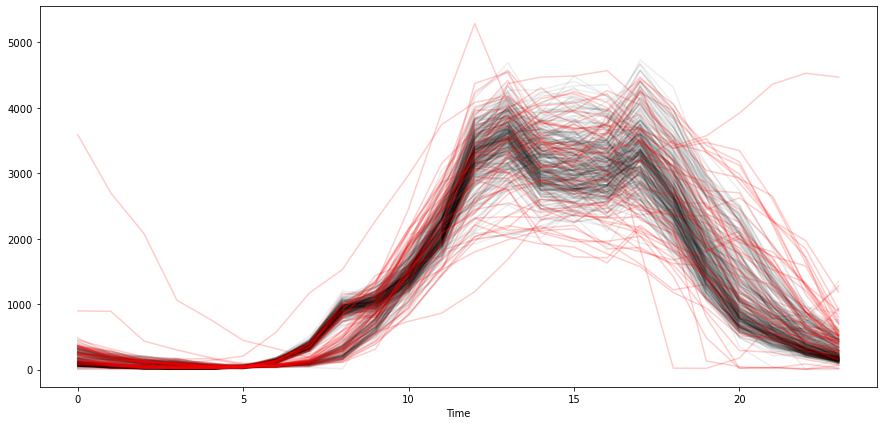

In [426]:
ax = non_weird.T.plot(color='black', alpha=0.07, legend=False, figsize=(15, 7))
weird.T.plot(ax=ax, color='red', alpha=0.2, legend=False, figsize=(15, 7))